In [2]:
import pandas as pd
import seaborn as sns   
import numpy as np
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
#load file
merged_hk_sgd = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\merged_hongkong_sgd.csv', encoding='utf-8')

In [16]:
merged_hk_sgd = merged_hk_sgd.dropna(subset=['price_sgd', 'polarity_class'])
# merged_hk_sgd['polarity_class'] = merged_hk_sgd['polarity_class'].replace({'Negative': 'Neutral'})
# merged_hk_sgd['log_price_sgd'] = np.log(merged_hk_sgd['price_sgd'])
resample_hk = merged_hk_sgd.sample(n=100, random_state=50) 
model_hk = ols('price_sgd ~ C(polarity_class)', data=resample_hk).fit()
anova_table = sm.stats.anova_lm(model_hk)

print(anova_table)



                     df         sum_sq      mean_sq         F    PR(>F)
C(polarity_class)   3.0   12313.368473  4104.456158  0.545841  0.652129
Residual           96.0  721872.944423  7519.509838       NaN       NaN


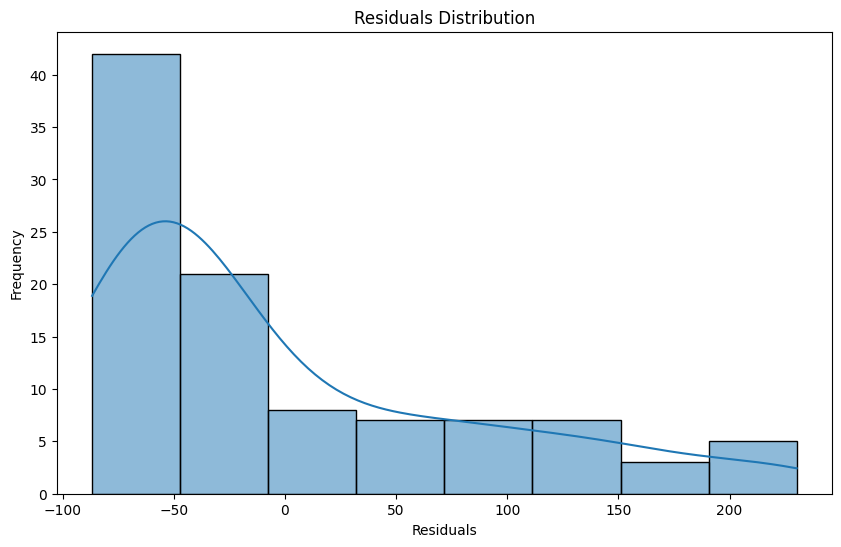

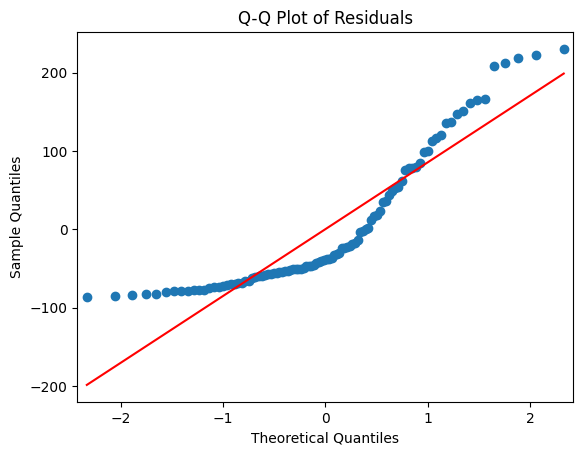

In [7]:
# Extract the residuals from the model
residuals = model_hk.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.show()

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Shapiro-Wilk Test for Residuals | p-value: 0.0000
The residuals do NOT follow a normal distribution (p < 0.05).


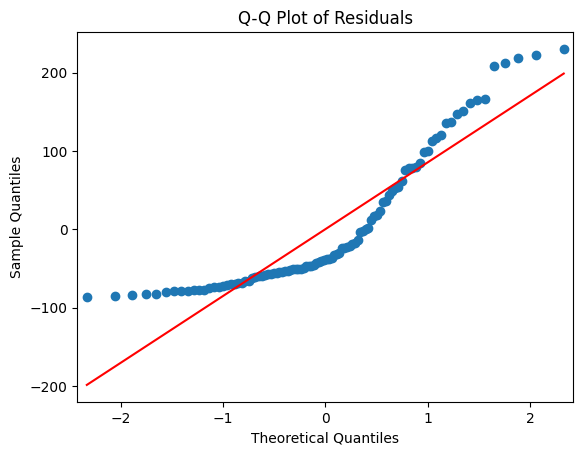

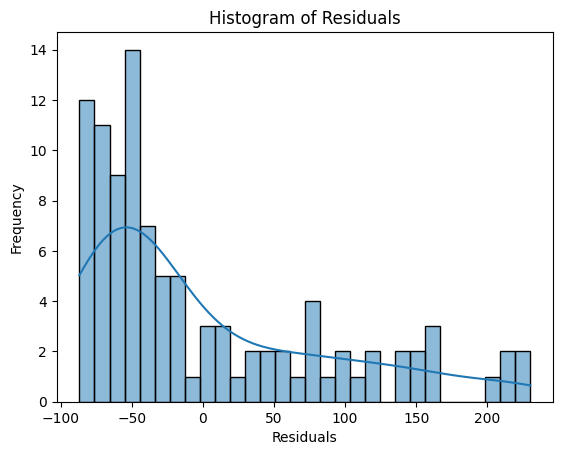

In [12]:
import seaborn as sns

model = ols('price_sgd ~ C(polarity_class)', data=resample_hk).fit()

# Extract residuals
residuals = model.resid

# Perform Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test for Residuals | p-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("The residuals do NOT follow a normal distribution (p < 0.05).")
else:
    print("The residuals follow a normal distribution (p >= 0.05).")

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [36]:
price_sgd = merged_hk_sgd['price_sgd']  # Replace 'price' with the actual column name for price in your CSV
polarity_class = merged_hk_sgd['polarity_class']  # Replace 'polarity_class' with the actual column name for polarity class
sampled_hk_data = merged_hk_sgd.sample(n=100, random_state=42)

# Now you can proceed with the Kruskal-Wallis test
groups = [group['price_sgd'].values for name, group in sampled_hk_data.groupby('polarity_class')]


# Performing the Kruskal-Wallis H-test
stat, p_value = stats.kruskal(*groups)

# Output the test statistic and p-value
print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")



Kruskal-Wallis Test Statistic: 2.8990564546940485
P-value: 0.40745195460557515
There is no statistically significant difference between the groups.


In [22]:
#load file 
merged_newyork_sgd = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\merged_ny_sgd.csv', encoding='utf-8')

In [23]:
model_ny = ols('price_sgd ~ C(polarity_class)', data=merged_newyork_sgd).fit()
anova_table = sm.stats.anova_lm(model_ny, typ=2)
print(anova_table)

                         sum_sq     df         F   PR(>F)
C(polarity_class)  1.302613e+04    2.0  0.668627  0.51452
Residual           1.052023e+06  108.0       NaN      NaN


Shapiro-Wilk Test for Residuals | p-value: 0.0000
The residuals do NOT follow a normal distribution (p < 0.05).


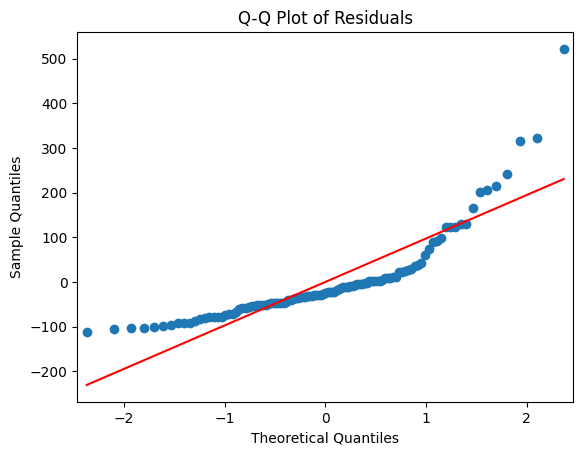

In [24]:
model_ny = ols('price_sgd ~ C(polarity_class)', data=merged_newyork_sgd).fit()

# Extract residuals
residuals = model_ny.resid

# Perform Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test for Residuals | p-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("The residuals do NOT follow a normal distribution (p < 0.05).")
else:
    print("The residuals follow a normal distribution (p >= 0.05).")
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [37]:
price_sgd = merged_newyork_sgd['price_sgd']
polarity_class = merged_newyork_sgd['polarity_class']  
sampled_ny_data = merged_newyork_sgd.sample(n=100, random_state=42)

groups = [group['price_sgd'].values for name, group in sampled_ny_data.groupby('polarity_class')]

stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")

Kruskal-Wallis Test Statistic: 1.352907381542124
P-value: 0.5084168023362605
There is no statistically significant difference between the groups.


                          sum_sq     df         F    PR(>F)
C(polarity_class)   33494.275488    3.0  2.040977  0.111634
Residual           672846.935664  123.0       NaN       NaN
Shapiro-Wilk Test for Residuals | p-value: 0.0000
The residuals do NOT follow a normal distribution (p < 0.05).


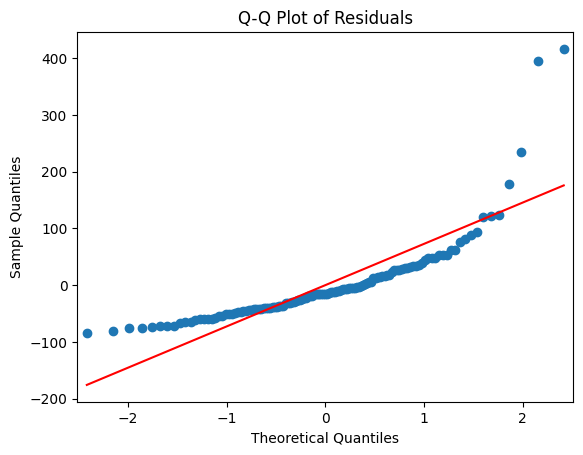

In [27]:
#load file 
merged_mexico_sgd = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\merged_mexico_sgd.csv', encoding='utf-8')
model_mexico = ols('price_sgd ~ C(polarity_class)', data=merged_mexico_sgd).fit()
anova_table = sm.stats.anova_lm(model_mexico, typ=2)
print(anova_table)


# Extract residuals
residuals = model_mexico.resid

# Perform Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test for Residuals | p-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("The residuals do NOT follow a normal distribution (p < 0.05).")
else:
    print("The residuals follow a normal distribution (p >= 0.05).")

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [38]:
price_sgd = merged_mexico_sgd['price_sgd']
polarity_class = merged_mexico_sgd['polarity_class']  
sampled_mexico_data = merged_mexico_sgd.sample(n=100, random_state=42)

groups = [group['price_sgd'].values for name, group in sampled_mexico_data.groupby('polarity_class')]

stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")

Kruskal-Wallis Test Statistic: 6.210139217240664
P-value: 0.10182225994838505
There is no statistically significant difference between the groups.


                         sum_sq     df         F    PR(>F)
C(polarity_class)  4.754857e+04    3.0  1.082419  0.360002
Residual           1.508197e+06  103.0       NaN       NaN
Shapiro-Wilk Test for Residuals | p-value: 0.0000
The residuals do NOT follow a normal distribution (p < 0.05).


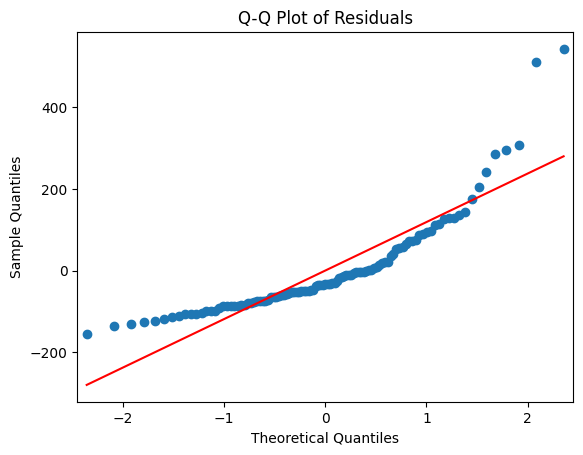

In [3]:
#load file 
merged_tokyo_sgd = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\merged_tokyo_sgd.csv', encoding='utf-8')
model_tokyo = ols('price_sgd ~ C(polarity_class)', data=merged_tokyo_sgd).fit()
anova_table = sm.stats.anova_lm(model_tokyo, typ=2)
print(anova_table)

# Extract residuals
residuals = model_tokyo.resid

# Perform Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test for Residuals | p-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("The residuals do NOT follow a normal distribution (p < 0.05).")
else:
    print("The residuals follow a normal distribution (p >= 0.05).")

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [4]:
price_sgd = merged_tokyo_sgd['price_sgd']
polarity_class = merged_tokyo_sgd['polarity_class']  
sampled_tokyo_data = merged_tokyo_sgd.sample(n=100, random_state=42)

groups = [group['price'].values for name, group in sampled_tokyo_data.groupby('polarity_class')]

stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between polarity groups.")

Kruskal-Wallis Test Statistic: 4.206493208930996
P-value: 0.2400125954333184
There is no statistically significant difference between polarity groups.


                         sum_sq     df         F    PR(>F)
C(polarity_class)  2.477673e+05    2.0  0.288567  0.749929
Residual           4.507723e+07  105.0       NaN       NaN
Shapiro-Wilk Test for Residuals | p-value: 0.0000
The residuals do NOT follow a normal distribution (p < 0.05).


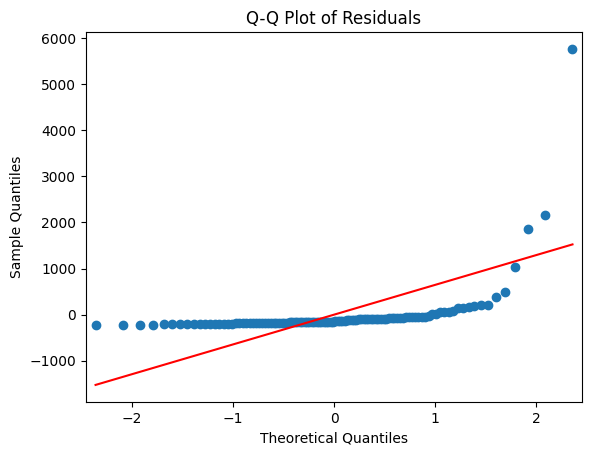

In [31]:
#load file 
merged_rio_sgd = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\merged_rio_sgd.csv', encoding='utf-8')
model_rio = ols('price_sgd ~ C(polarity_class)', data=merged_rio_sgd).fit()
anova_table = sm.stats.anova_lm(model_rio, typ=2)
print(anova_table)

# Extract residuals
residuals = model_rio.resid

# Perform Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test for Residuals | p-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("The residuals do NOT follow a normal distribution (p < 0.05).")
else:
    print("The residuals follow a normal distribution (p >= 0.05).")

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [40]:
price_sgd = merged_rio_sgd['price_sgd']
polarity_class = merged_rio_sgd['polarity_class']  
sampled_rio_data = merged_rio_sgd.sample(n=100, random_state=42)

groups = [group['price'].values for name, group in sampled_rio_data.groupby('polarity_class')]

stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")

Kruskal-Wallis Test Statistic: 0.960510275290551
P-value: 0.6186255370068272
There is no statistically significant difference between the groups.


                         sum_sq     df         F    PR(>F)
C(polarity_class)  2.252228e+05    2.0  1.305283  0.275014
Residual           1.009400e+07  117.0       NaN       NaN
Shapiro-Wilk Test for Residuals | p-value: 0.0000
The residuals do NOT follow a normal distribution (p < 0.05).


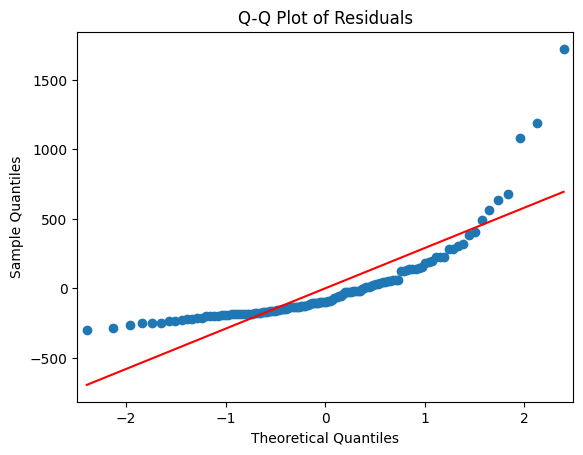

In [42]:
#load file 
merged_paris_sgd = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\merged_paris_sgd.csv', encoding='utf-8')
model_paris = ols('price_sgd ~ C(polarity_class)', data=merged_paris_sgd).fit()
anova_table = sm.stats.anova_lm(model_paris, typ=2)
print(anova_table)


# Extract residuals
residuals = model_paris.resid

# Perform Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test for Residuals | p-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("The residuals do NOT follow a normal distribution (p < 0.05).")
else:
    print("The residuals follow a normal distribution (p >= 0.05).")

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


                         sum_sq     df         F    PR(>F)
C(polarity_class)  2.252228e+05    2.0  1.305283  0.275014
Residual           1.009400e+07  117.0       NaN       NaN
Shapiro-Wilk Test for Residuals | p-value: 0.0000
The residuals do NOT follow a normal distribution (p < 0.05).


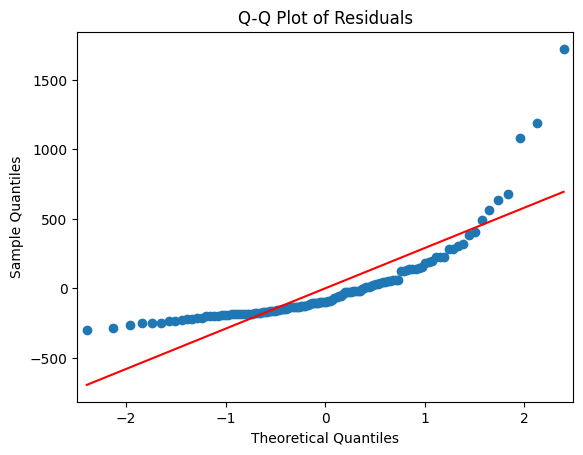

In [12]:
#load file 
merged_paris_sgd = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\merged_paris_sgd.csv', encoding='utf-8')
model = ols('price_sgd ~ C(polarity_class)', data=merged_paris_sgd).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

model = ols('price_sgd ~ C(polarity_class)', data=merged_paris_sgd).fit()

# Extract residuals
residuals = model.resid

# Perform Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test for Residuals | p-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("The residuals do NOT follow a normal distribution (p < 0.05).")
else:
    print("The residuals follow a normal distribution (p >= 0.05).")

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [43]:
price_sgd = merged_paris_sgd['price_sgd']
polarity_class = merged_paris_sgd['polarity_class']  
sampled_paris_data = merged_paris_sgd.sample(n=100, random_state=42)

groups = [group['price'].values for name, group in sampled_paris_data.groupby('polarity_class')]

stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")

Kruskal-Wallis Test Statistic: 2.707638827544162
P-value: 0.2582520033073322
There is no statistically significant difference between the groups.
